# 大模型选型学习手册

## 1、模型仓库

选择大模型的第一步，是了解主流的模型来源平台，它们通常也包含丰富的预训练数据集与文档支持。

### 主流平台：

1. **[ModelScope](https://modelscope.cn/models)**（阿里达摩院）：中文模型资源丰富，包含多模态、文档理解等模型。
2. **[HuggingFace](https://huggingface.co/models)**：国际主流平台，模型覆盖 NLP、CV、音频等各类任务。

📌 *以上平台也可用于查找数据集、微调脚本和推理示例。*

## 2、确定任务类型

根据业务或研究目标，确定我们需要的大模型类型与能力，常见任务如下：

1. **多模态处理**：输入/输出为视觉（视频/图片）、听觉（音频）、文本的组合，如图文理解、图文生成、视频问答。
2. **计算机视觉（CV）**：图像分类、目标检测、分割、OCR 等。
3. **自然语言处理（NLP）**：文本分类、生成、摘要、问答、对话、意图识别等。
4. **结构化信息提取**：表格识别（如表格OCR、结构还原）、信息抽取等。
5. **其他领域**：如推荐系统、代码生成、生物医药等。

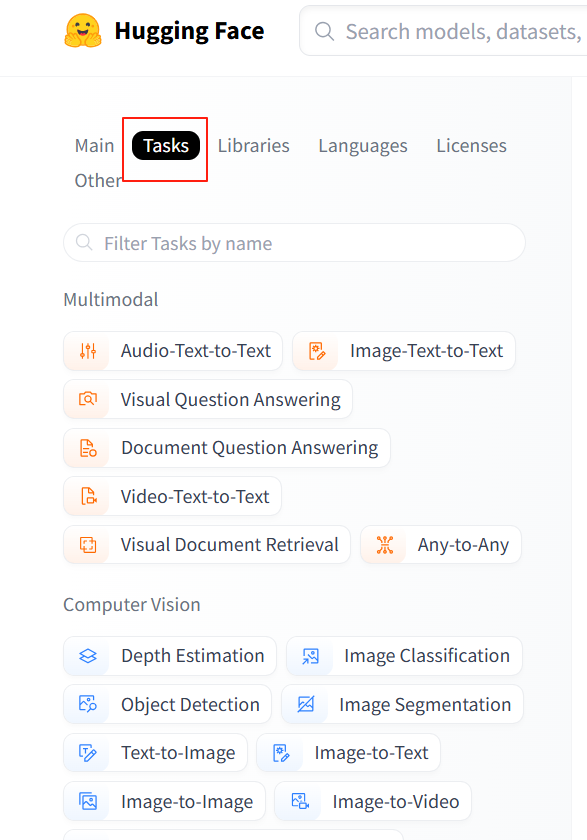

## 3、模型选型维度

选择一个具体模型，进入模型主页查看其**基本说明和运行代码**：

| 维度          | 说明                              |
| ----------- | ------------------------------- |
| **模型大小**    | 模型参数量大小对资源占用影响较大，如 7B、13B、32B   |
| **语言适配性**   | 模型是否对中文有良好支持，例如 ChatGLM、Qwen 等  |
| **开源/商用授权** | 是否开放源码、可商用，是否有企业许可条款            |
| **推理性能**    | 是否支持低延迟、低资源部署，支持 CPU/GPU/NPU 推理 |
| **社区活跃度**   | 维护频率、是否有活跃用户社区、是否有现成示例和教程       |
| **微调难度**    | 是否容易进行任务微调、支持参数高效微调（如LoRA）      |
| **其他能力范围**    | 模型是否支持所需的任务，例如超长文本等    |


## 4、典型模型推荐（按任务）

| 任务类型   | 推荐模型                              | 平台                     | 说明                  |
| ------ | --------------------------------- | ---------------------- | ------------------- |
| 图文理解   | Qwen-VL、MiniCPM-V          | HuggingFace/ModelScope | 多模态输入支持，适合图文生成、图文问答 |
| 文本生成   | DeepSeek-R1-Distill-Qwen-32B、Qwen/Qwen3-32B | HuggingFace/ModelScope            | 中文支持较好，可用于对话与总结     |
| OCR    | Paddle            | github             | 文本检测与识别，适合票据/证件等场景  |

## 5、实操练习建议

1. 确定1个感兴趣的任务（如图文问答）
2. 查找并下载模型（如 Qwen-VL）
3. 本地部署，包括安装环境
4. 编写一份测试笔记，记录输入输出、模型表现、过程日志、资源消耗


## 6、如何查看模型运行消耗多少显卡？

### ✅ 一、使用命令行工具

#### 1. `nvidia-smi`（最常用）

在终端运行：

```bash
nvidia-smi
```

效果如下：

```
+-----------------------------------------------------------------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  A100-PCIE-40GB           On   | 00000000:18:00.0 Off |                    |
|  0%   34C    P0    43W / 300W |   7825MiB / 40537MiB |     13%      Default |
+-----------------------------------------------------------------------------+
```

##### 重点看这几列：

* **Memory-Usage**：当前 GPU 显存使用量（如 7825MiB / 40537MiB）
* **GPU-Util**：当前计算利用率（如 13%）
* **Pwr: Usage/Cap**：功耗使用情况

运行模型推理或训练后，这些值会立即上升。

---


### ✅ 二、使用监控工具（进阶）

#### 1. [gpustat](https://github.com/wookayin/gpustat)

安装：

```bash
pip install gpustat
```

使用：

```bash
gpustat
```

比 `nvidia-smi` 更简洁清晰，支持多用户共享 GPU 的情况。

---

### ✅ 三、持续监控消耗（附加技巧）

如果想要持续观察 GPU 使用趋势，可以使用：

```bash
watch -n 1 nvidia-smi
```

每 1 秒刷新一次，便于观察大模型推理时显存/功耗是否飙升。

